In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

C:\Users\aksha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("DS2_C5_S1_Loan_Data_Concept.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
c=df.columns
c

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
df.shape

(9578, 14)

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [9]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [10]:
df["purpose"]=df["purpose"].astype("category")

In [11]:
df.dtypes

credit.policy           int64
purpose              category
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
dtype: object

In [12]:
df1=df.copy()

In [13]:
label_encoder=preprocessing.LabelEncoder()

In [14]:
df1["purpose_encoded"]=label_encoder.fit_transform(df1["purpose"])

In [15]:
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [16]:
df1.dtypes

credit.policy           int64
purpose              category
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
purpose_encoded         int32
dtype: object

In [17]:
scale="minmax"

In [18]:
def feature_scale(scale):
    numerics=["int16","int32","int64","float16","float32","float64"]
    new_df=df1.select_dtypes(include=numerics)
    if scale=="minmax":
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
    return df_scaled

In [19]:

scaled_df=feature_scale(scale)
scaled_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1.0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0,0.333333
1,1.0,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0,0.166667
2,1.0,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0,0.333333
3,1.0,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0,0.333333
4,1.0,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0,1.0,0.000000
9574,0.0,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0,1.0,0.000000
9575,0.0,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0,1.0,0.333333
9576,0.0,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0,1.0,0.666667


In [20]:
#feature reduction using correlation

In [21]:
h=scaled_df.corr()
h

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.017569
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,0.117067
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.154827
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.088958
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.053279
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.057337
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.047526
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.042364
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.062947
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.037516


In [22]:
#find target column based on use case
#check correlation of all other variables with target column

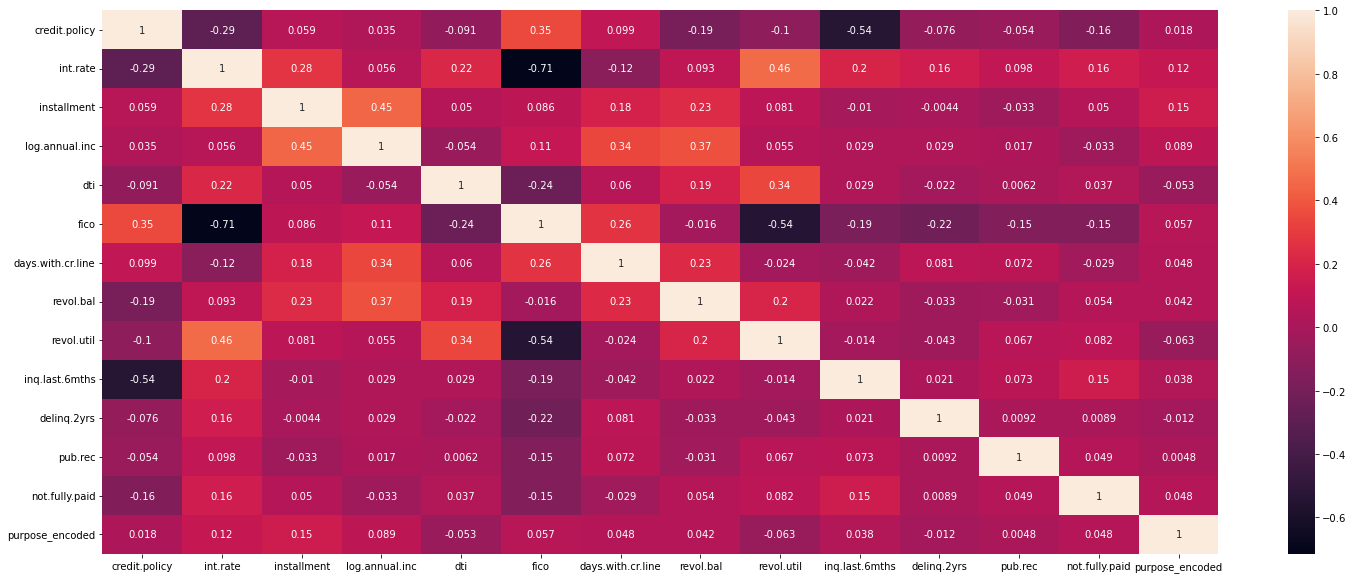

In [23]:
plt.figure(figsize=(25,10))
sb.heatmap(h,annot=True)

plt.show()

In [24]:
#train test split
#row indexing method
#first 70% for training and remaining 30% for test

In [25]:
l=len(scaled_df)
l

9578

In [26]:
train_split=int(l*0.7)

In [27]:
train_df=scaled_df.iloc[:train_split,:]

In [28]:
train_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1.0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0,0.333333
1,1.0,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0,0.166667
2,1.0,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0,0.333333
3,1.0,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0,0.333333
4,1.0,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,1.0,0.342711,0.250057,0.421692,0.629840,0.395349,0.252625,0.011782,0.451261,0.030303,0.000000,0.0,0.0,0.000000
6700,1.0,0.350384,0.446656,0.453657,0.200267,0.558140,0.178744,0.009586,0.125210,0.030303,0.076923,0.0,1.0,0.333333
6701,1.0,0.417519,0.707065,0.547549,0.671896,0.488372,0.345401,0.042509,0.534454,0.000000,0.000000,0.0,0.0,0.166667
6702,1.0,0.506394,0.721570,0.579067,0.154206,0.604651,0.244032,0.003800,0.771429,0.000000,0.000000,0.0,0.0,0.166667


In [29]:
test_df=scaled_df.iloc[train_split:,:]

In [30]:
test_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
6704,1.0,0.372762,0.287700,0.543067,0.454940,0.534884,0.307605,0.036976,0.756303,0.030303,0.000000,0.0,0.0,0.333333
6705,1.0,0.617008,0.263102,0.520985,0.311081,0.232558,0.278394,0.004142,0.712605,0.000000,0.076923,0.2,0.0,0.333333
6706,1.0,0.271739,0.333359,0.557647,0.090454,0.488372,0.341280,0.007961,0.345378,0.090909,0.000000,0.0,0.0,0.333333
6707,1.0,0.328645,0.195961,0.506334,0.017356,0.790698,0.185618,0.000750,0.097479,0.000000,0.000000,0.0,0.0,0.833333
6708,1.0,0.372762,0.269787,0.479775,0.733645,0.465116,0.115173,0.007420,0.553782,0.060606,0.000000,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0,1.0,0.000000
9574,0.0,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0,1.0,0.000000
9575,0.0,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0,1.0,0.333333
9576,0.0,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0,1.0,0.666667


In [31]:
#train test split using function,(random)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#assume last column as target variable here for example

In [34]:
x,y=scaled_df.iloc[:,:-1],scaled_df.iloc[:,-1]
#separate our dept and independent var

In [35]:
x.shape,y.shape

((9578, 13), (9578,))

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=30)

In [37]:
#modelling-x_train,y_train
#model evaluation-x_test--model should give you y_pred

In [38]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2376,1.0,0.477621,0.276613,0.453657,0.723632,0.348837,0.146102,0.009939,0.690756,0.000000,0.000000,0.0,0.0
5699,1.0,0.506394,0.573875,0.551510,0.551068,0.372093,0.321347,0.008988,0.511765,0.000000,0.384615,0.0,0.0
3558,1.0,0.417519,0.287137,0.526833,0.138852,0.348837,0.316190,0.011242,0.258824,0.060606,0.000000,0.0,0.0
317,1.0,0.406650,0.127511,0.468750,0.289052,0.232558,0.381426,0.007769,0.370588,0.030303,0.000000,0.2,1.0
8068,0.0,0.455243,0.275131,0.377263,0.377837,0.209302,0.070502,0.003246,0.316807,0.454545,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1.0,0.750639,0.762329,0.529422,0.234980,0.418605,0.281830,0.009797,0.625210,0.090909,0.000000,0.2,0.0
919,1.0,0.127877,0.322022,0.390664,0.074766,0.837209,0.797265,0.002279,0.140336,0.000000,0.000000,0.0,0.0
500,1.0,0.127877,0.318637,0.570034,0.106475,0.767442,0.469105,0.001420,0.068908,0.030303,0.000000,0.0,0.0
4517,1.0,0.484015,0.350493,0.563680,0.566088,0.325581,0.209667,0.007506,0.219328,0.030303,0.230769,0.0,0.0


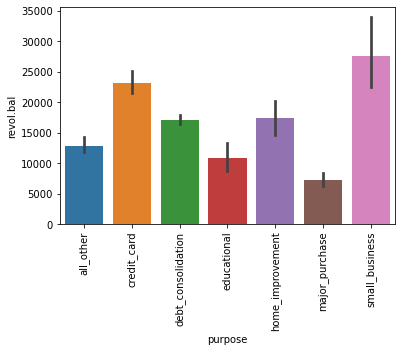

In [39]:
sb.barplot(data=df,x="purpose",y="revol.bal")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='revol.bal', ylabel='Count'>

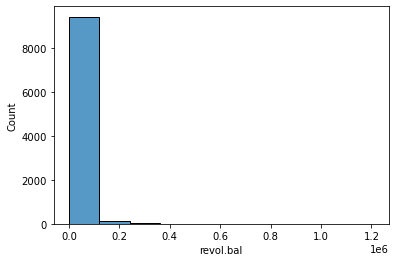

In [40]:
sb.histplot(data=df,x="revol.bal",bins=10)

In [41]:
s=df["purpose"].value_counts()
s

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

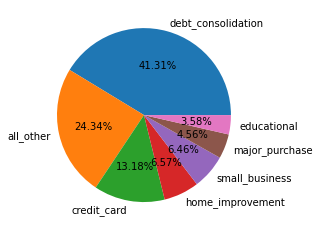

In [42]:
plt.pie(s.values,labels=s.index,autopct="%.2f%%")
plt.show()

In [43]:
#one hot encoding:this has advantage over label encoding that it doesnt give priority to any variable like male/female

In [59]:
emp_id=[100,101,102,103,104,105]
gender=["male","female","male","female","male","male"]

In [60]:
df=pd.DataFrame()

In [61]:
df["empid"]=emp_id
df["gender"]=gender

In [62]:
df

,empid,gender
0,100,male
1,101,female
2,102,male
3,103,female
4,104,male
5,105,male


In [ ]:
#One hot encoding

In [63]:
one_hot_encoded_data = pd.get_dummies(df, columns =['gender'])
one_hot_encoded_data

,empid,gender_female,gender_male
0,100,0,1
1,101,1,0
2,102,0,1
3,103,1,0
4,104,0,1
5,105,0,1


In [ ]:
#Label Encoding

In [64]:
l=preprocessing.LabelEncoder()
df["gender_enc"]=l.fit_transform(df["gender"])
df

,empid,gender,gender_enc
0,100,male,1
1,101,female,0
2,102,male,1
3,103,female,0
4,104,male,1
5,105,male,1


In [1]:
pip install reverse_geocoder

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=1363e53f29775c36286e5ffd4ef8e60b02ea34c1f72370ca62e455762da63552
  Stored in directory: c:\users\aksha\appdata\local\pip\cache\wheels\10\05\be\d2edd4ff207cf625ce8bd20cf1493c27838828e8920aff9f4e
Successfully built reverse-geocoder
Note: you may need to restart the kernel to use updated packages.


In [8]:
df = pd.DataFrame({
    'A': [1, 9, np.nan, 4, 5],
    'B': [2, 2, 6, np.nan, 19]
})

In [9]:
df

,A,B
0,1.0,2.0
1,9.0,2.0
2,NaN,6.0
3,4.0,NaN
4,5.0,19.0


In [10]:
df.interpolate()

,A,B
0,1.0,2.0
1,9.0,2.0
2,6.5,6.0
3,4.0,12.5
4,5.0,19.0
